# Problem 1: Token & Position Embeddings - Interactive Notebook

This notebook helps you explore and visualize embeddings interactively.

## Setup

In [2]:
import sys
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# When finished, uncomment the following sentence and import your own solution
# from solution import Embeddings
from problem import Embeddings

# Set random seed for reproducibility
torch.manual_seed(42)

print("Setup complete!")

Setup complete!


In [9]:
t = torch.tensor([[1, 2, 3, 4], [2,3,4, 2]])
print(t.shape)

torch.Size([2, 4])


## Create Embeddings Module

In [8]:
# Create embeddings with small dimensions for visualization
embeddings = Embeddings(
    vocab_size=1000,  # Smaller vocab for demo
    n_positions=100,  # Shorter sequences
    n_embd=64,        # Smaller embedding dimension
    embd_pdrop=0.1
)

print(embeddings)
print(f"\nTotal parameters: {sum(p.numel() for p in embeddings.parameters()):,}")

Embeddings(
  (wte): Embedding(1000, 64)
  (wpe): Embedding(1000, 64)
  (dropout): Dropout(p=0.1, inplace=False)
)

Total parameters: 128,000


## Test Forward Pass

In [9]:
# Create sample input
batch_size = 2
seq_len = 10
input_ids = torch.randint(0, 1000, (batch_size, seq_len))

print(f"Input shape: {input_ids.shape}")
print(f"Input tokens:\n{input_ids}")

# Set to eval mode to disable dropout for visualization
embeddings.eval()

# Forward pass
with torch.no_grad():
    output = embeddings(input_ids)

print(f"\nOutput shape: {output.shape}")
print(f"Expected shape: ({batch_size}, {seq_len}, 64)")
print(f"\nFirst few values of output[0, 0, :10]:\n{output[0, 0, :10]}")

Input shape: torch.Size([2, 10])
Input tokens:
tensor([[731,  89, 334, 666, 402, 725, 260, 644, 435, 198],
        [152, 494, 209, 999,  59,  71, 371, 887, 147, 615]])

Output shape: torch.Size([2, 10, 64])
Expected shape: (2, 10, 64)

First few values of output[0, 0, :10]:
tensor([-1.1580,  1.4658,  0.1678,  0.3421,  0.6367, -1.6949,  0.3303,  0.2066,
        -1.7931,  0.3117])


## Visualize Token Embeddings

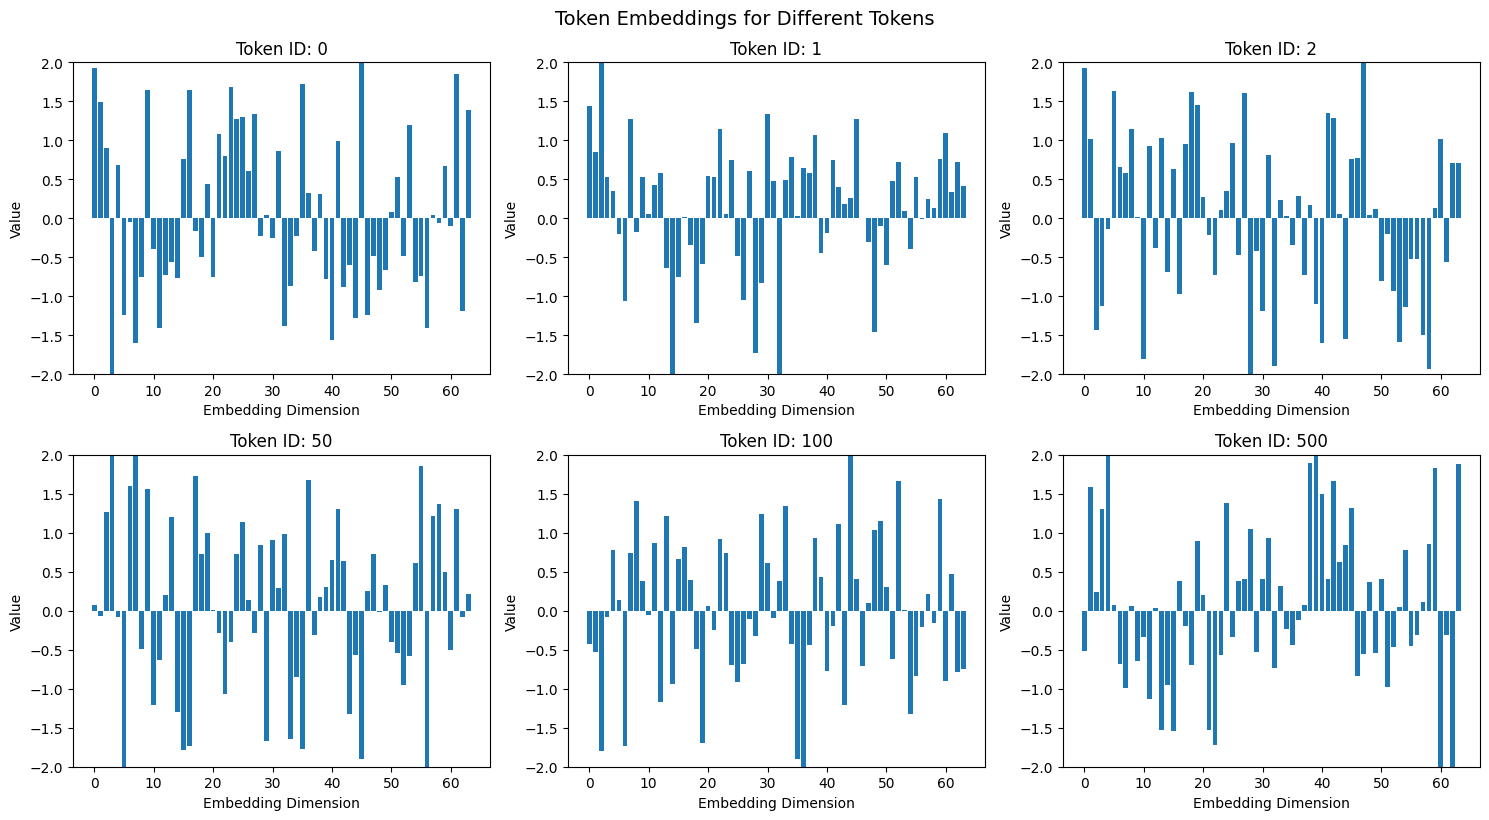

Each token has a unique embedding vector!


In [10]:
# Visualize embeddings for a few tokens
token_ids = [0, 1, 2, 50, 100, 500]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, token_id in enumerate(token_ids):
    # Get embedding for this token
    token_tensor = torch.tensor([[token_id]])
    with torch.no_grad():
        emb = embeddings.wte(token_tensor).squeeze()
    
    # Plot
    axes[idx].bar(range(len(emb)), emb.numpy())
    axes[idx].set_title(f"Token ID: {token_id}")
    axes[idx].set_xlabel("Embedding Dimension")
    axes[idx].set_ylabel("Value")
    axes[idx].set_ylim([-2, 2])

plt.tight_layout()
plt.suptitle("Token Embeddings for Different Tokens", y=1.02, fontsize=14)
plt.show()

print("Each token has a unique embedding vector!")

## Visualize Position Embeddings

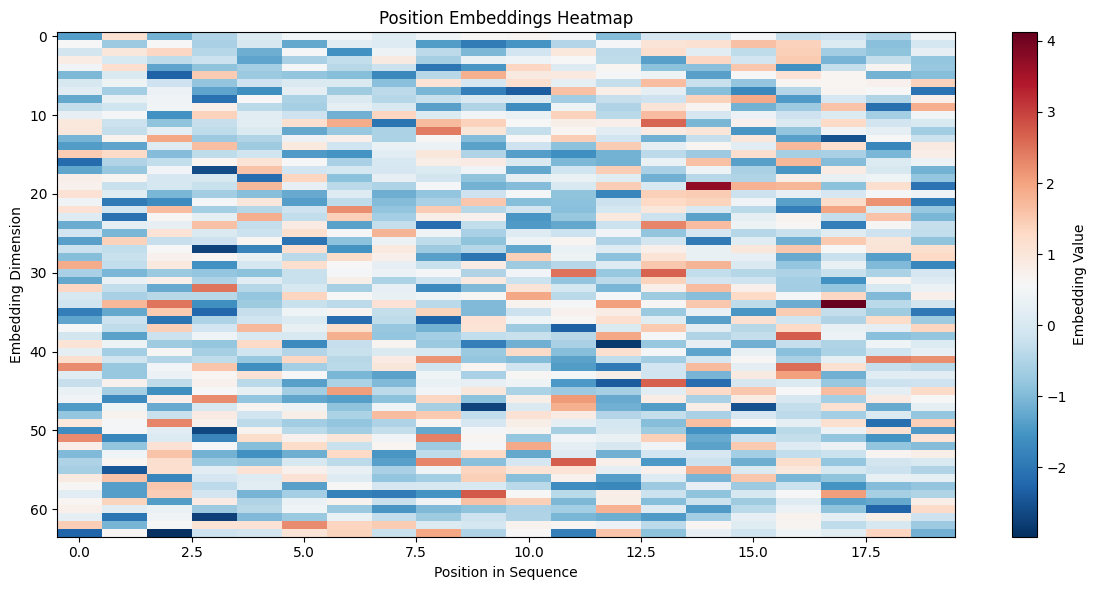

Each position has its own learned embedding pattern!


In [11]:
# Get position embeddings for first 20 positions
n_positions_viz = 20
position_ids = torch.arange(0, n_positions_viz).unsqueeze(0)

with torch.no_grad():
    pos_emb = embeddings.wpe(position_ids).squeeze(0).numpy()

# Plot as heatmap
plt.figure(figsize=(12, 6))
plt.imshow(pos_emb.T, aspect='auto', cmap='RdBu_r', interpolation='nearest')
plt.colorbar(label='Embedding Value')
plt.xlabel('Position in Sequence')
plt.ylabel('Embedding Dimension')
plt.title('Position Embeddings Heatmap')
plt.tight_layout()
plt.show()

print("Each position has its own learned embedding pattern!")

## Compare Token vs Position vs Combined Embeddings

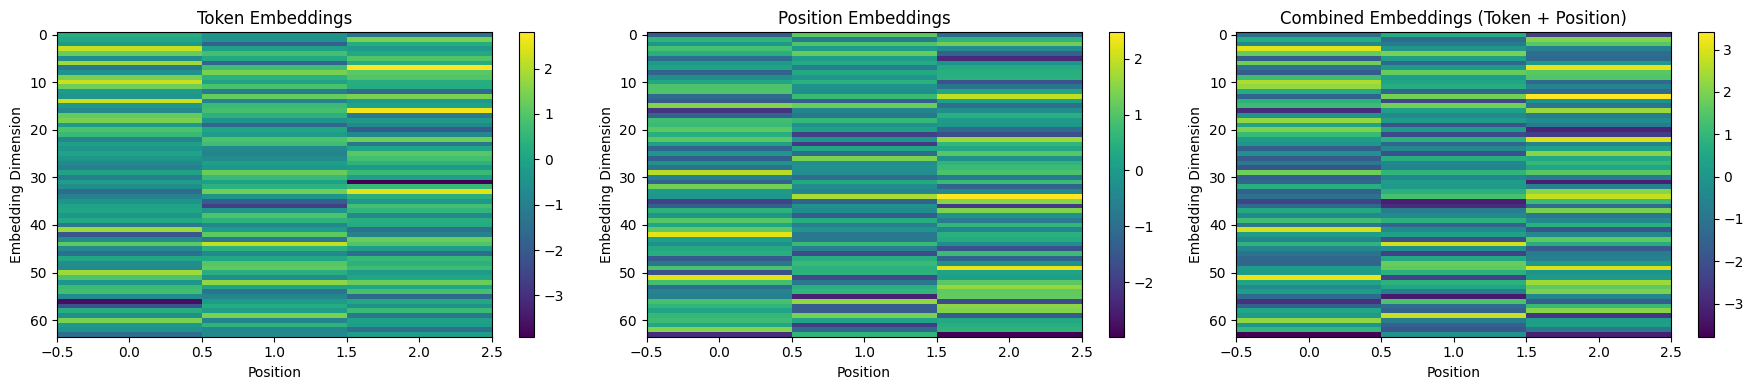

Combined = Token + Position (element-wise addition)


In [12]:
# Create a simple input
test_input = torch.tensor([[42, 100, 256]])
position_ids = torch.arange(0, 3).unsqueeze(0)

with torch.no_grad():
    token_emb = embeddings.wte(test_input)
    pos_emb = embeddings.wpe(position_ids)
    combined = token_emb + pos_emb

# Plot all three
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Token embeddings
im1 = axes[0].imshow(token_emb.squeeze().T.numpy(), aspect='auto', cmap='viridis')
axes[0].set_title('Token Embeddings')
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Embedding Dimension')
plt.colorbar(im1, ax=axes[0])

# Position embeddings
im2 = axes[1].imshow(pos_emb.squeeze().T.numpy(), aspect='auto', cmap='viridis')
axes[1].set_title('Position Embeddings')
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Embedding Dimension')
plt.colorbar(im2, ax=axes[1])

# Combined embeddings
im3 = axes[2].imshow(combined.squeeze().T.numpy(), aspect='auto', cmap='viridis')
axes[2].set_title('Combined Embeddings (Token + Position)')
axes[2].set_xlabel('Position')
axes[2].set_ylabel('Embedding Dimension')
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()

print("Combined = Token + Position (element-wise addition)")

## Test Dropout Effect

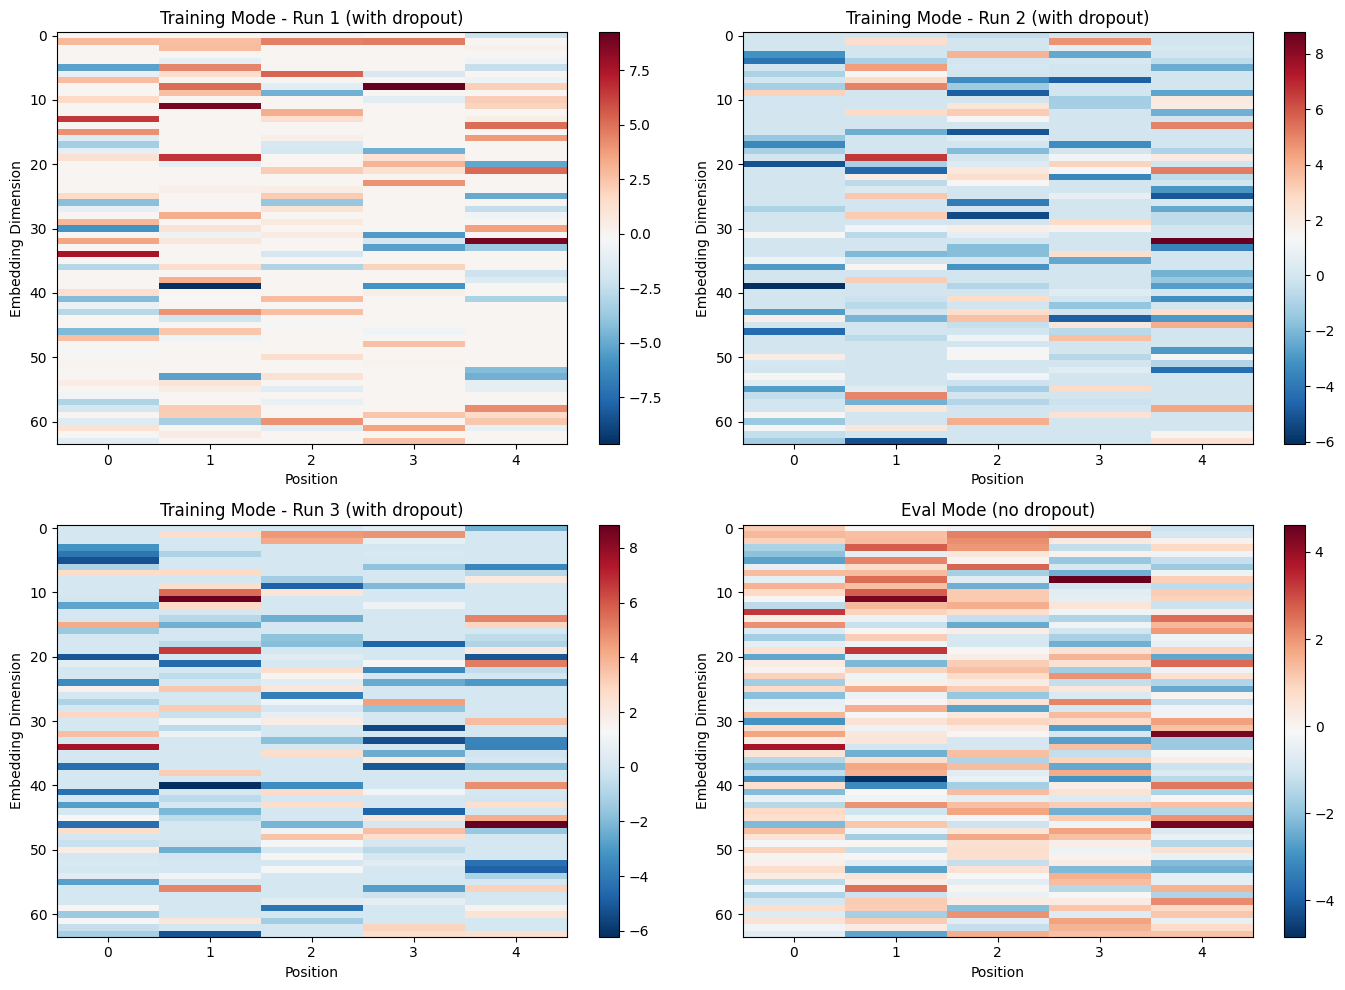

Notice: Training runs show different patterns (dropout), but eval is consistent!


In [13]:
# Create embeddings with high dropout for visualization
emb_with_dropout = Embeddings(
    vocab_size=1000,
    n_positions=100,
    n_embd=64,
    embd_pdrop=0.5  # 50% dropout!
)

test_input = torch.tensor([[1, 2, 3, 4, 5]])

# Training mode (dropout active)
emb_with_dropout.train()
outputs_train = []
for i in range(3):
    out = emb_with_dropout(test_input)
    outputs_train.append(out.detach())

# Eval mode (no dropout)
emb_with_dropout.eval()
with torch.no_grad():
    output_eval = emb_with_dropout(test_input)

# Plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i in range(3):
    ax = axes[i // 2, i % 2]
    im = ax.imshow(outputs_train[i].squeeze().T.numpy(), aspect='auto', cmap='RdBu_r')
    ax.set_title(f'Training Mode - Run {i+1} (with dropout)')
    ax.set_xlabel('Position')
    ax.set_ylabel('Embedding Dimension')
    plt.colorbar(im, ax=ax)

im = axes[1, 1].imshow(output_eval.squeeze().T.numpy(), aspect='auto', cmap='RdBu_r')
axes[1, 1].set_title('Eval Mode (no dropout)')
axes[1, 1].set_xlabel('Position')
axes[1, 1].set_ylabel('Embedding Dimension')
plt.colorbar(im, ax=axes[1, 1])

plt.tight_layout()
plt.show()

print("Notice: Training runs show different patterns (dropout), but eval is consistent!")

## Experiment: Different Embedding Dimensions

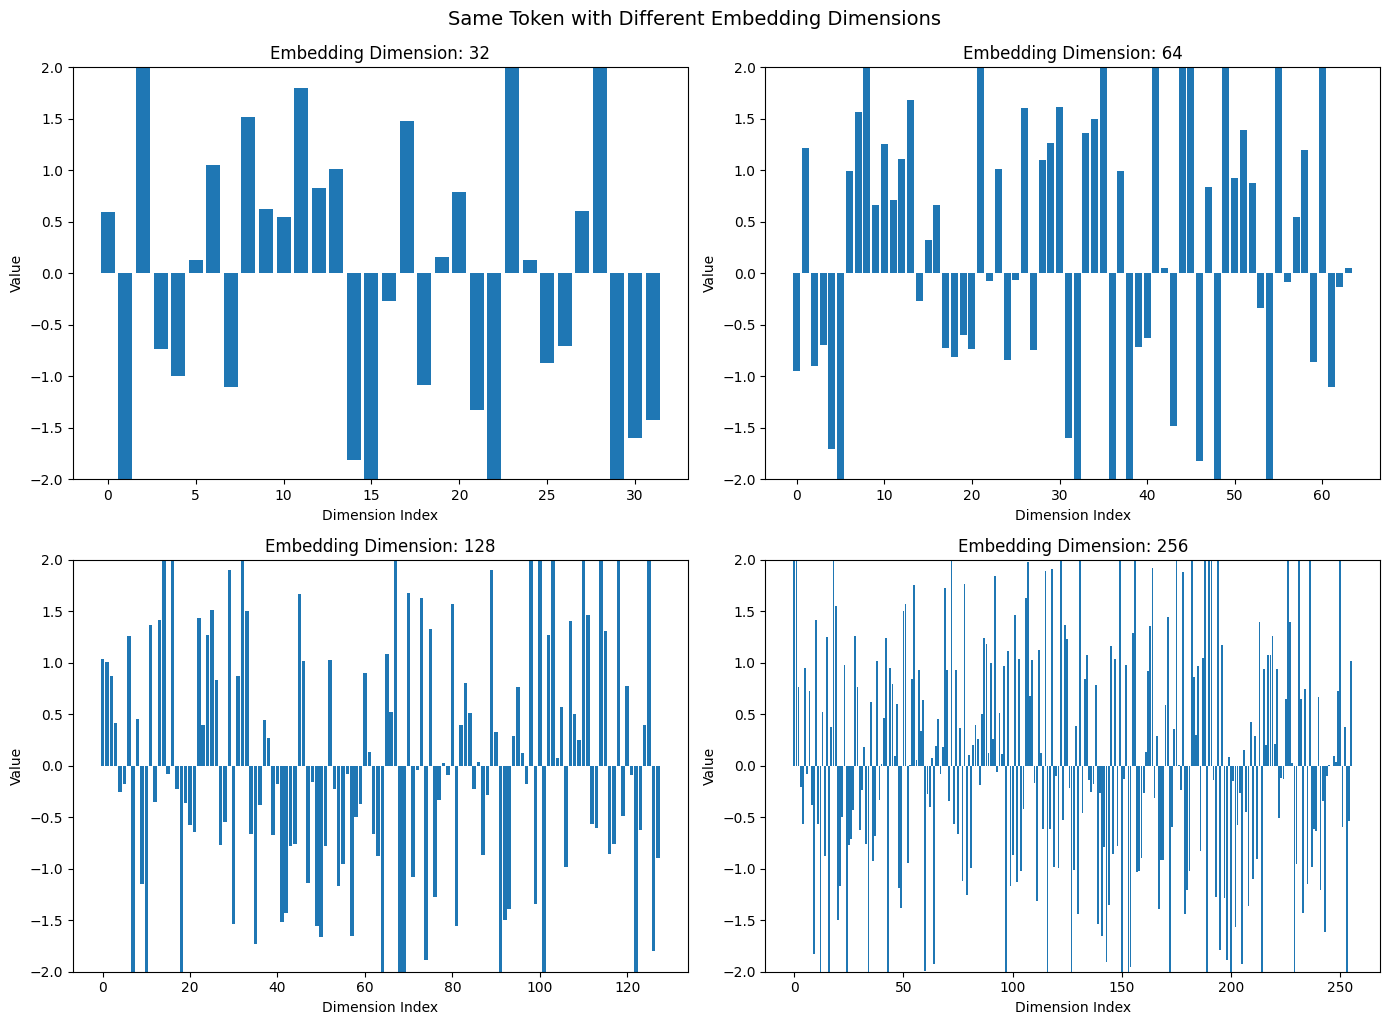

Larger embedding dimensions provide more capacity to represent information!


In [14]:
# Compare different embedding dimensions
emb_dims = [32, 64, 128, 256]
test_input = torch.tensor([[42]])

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, n_embd in enumerate(emb_dims):
    emb = Embeddings(vocab_size=1000, n_positions=100, n_embd=n_embd)
    emb.eval()
    
    with torch.no_grad():
        out = emb(test_input).squeeze()
    
    axes[idx].bar(range(len(out)), out.numpy())
    axes[idx].set_title(f'Embedding Dimension: {n_embd}')
    axes[idx].set_xlabel('Dimension Index')
    axes[idx].set_ylabel('Value')
    axes[idx].set_ylim([-2, 2])

plt.tight_layout()
plt.suptitle('Same Token with Different Embedding Dimensions', y=1.02, fontsize=14)
plt.show()

print("Larger embedding dimensions provide more capacity to represent information!")

## Verify Your Implementation

Run the tests to make sure everything works!

In [15]:
# Quick verification
embeddings = Embeddings()
input_ids = torch.randint(0, 50257, (2, 10))
output = embeddings(input_ids)

print("✓ Module initializes correctly")
print(f"✓ Forward pass works: {input_ids.shape} → {output.shape}")
print(f"✓ Expected shape: (2, 10, 768)")
print(f"✓ Actual shape: {output.shape}")
print("\n✅ Basic functionality verified!")
print("\nRun 'python -m pytest test_embeddings.py -v' for complete validation.")

✓ Module initializes correctly
✓ Forward pass works: torch.Size([2, 10]) → torch.Size([2, 10, 768])
✓ Expected shape: (2, 10, 768)
✓ Actual shape: torch.Size([2, 10, 768])

✅ Basic functionality verified!

Run 'python -m pytest test_embeddings.py -v' for complete validation.
